## Real World Smartphone's Dataset

https://www.kaggle.com/datasets/abhijitdahatonde/real-world-smartphones-dataset/

This dataset provides a comprehensive collection of information about all the latest smartphones available in the market as of the current time. The dataset was created by web scraping reputable online sources to gather accurate and up-to-date information about various smartphone models, their specifications, features, and pricing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/Shareddrives/Team Rivas: MSBA Core B Group 8/DSO 510: Business Analytics/Final Group Project/smartphones.csv')

In [ ]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [ ]:
import missingno as msno

<Axes: >

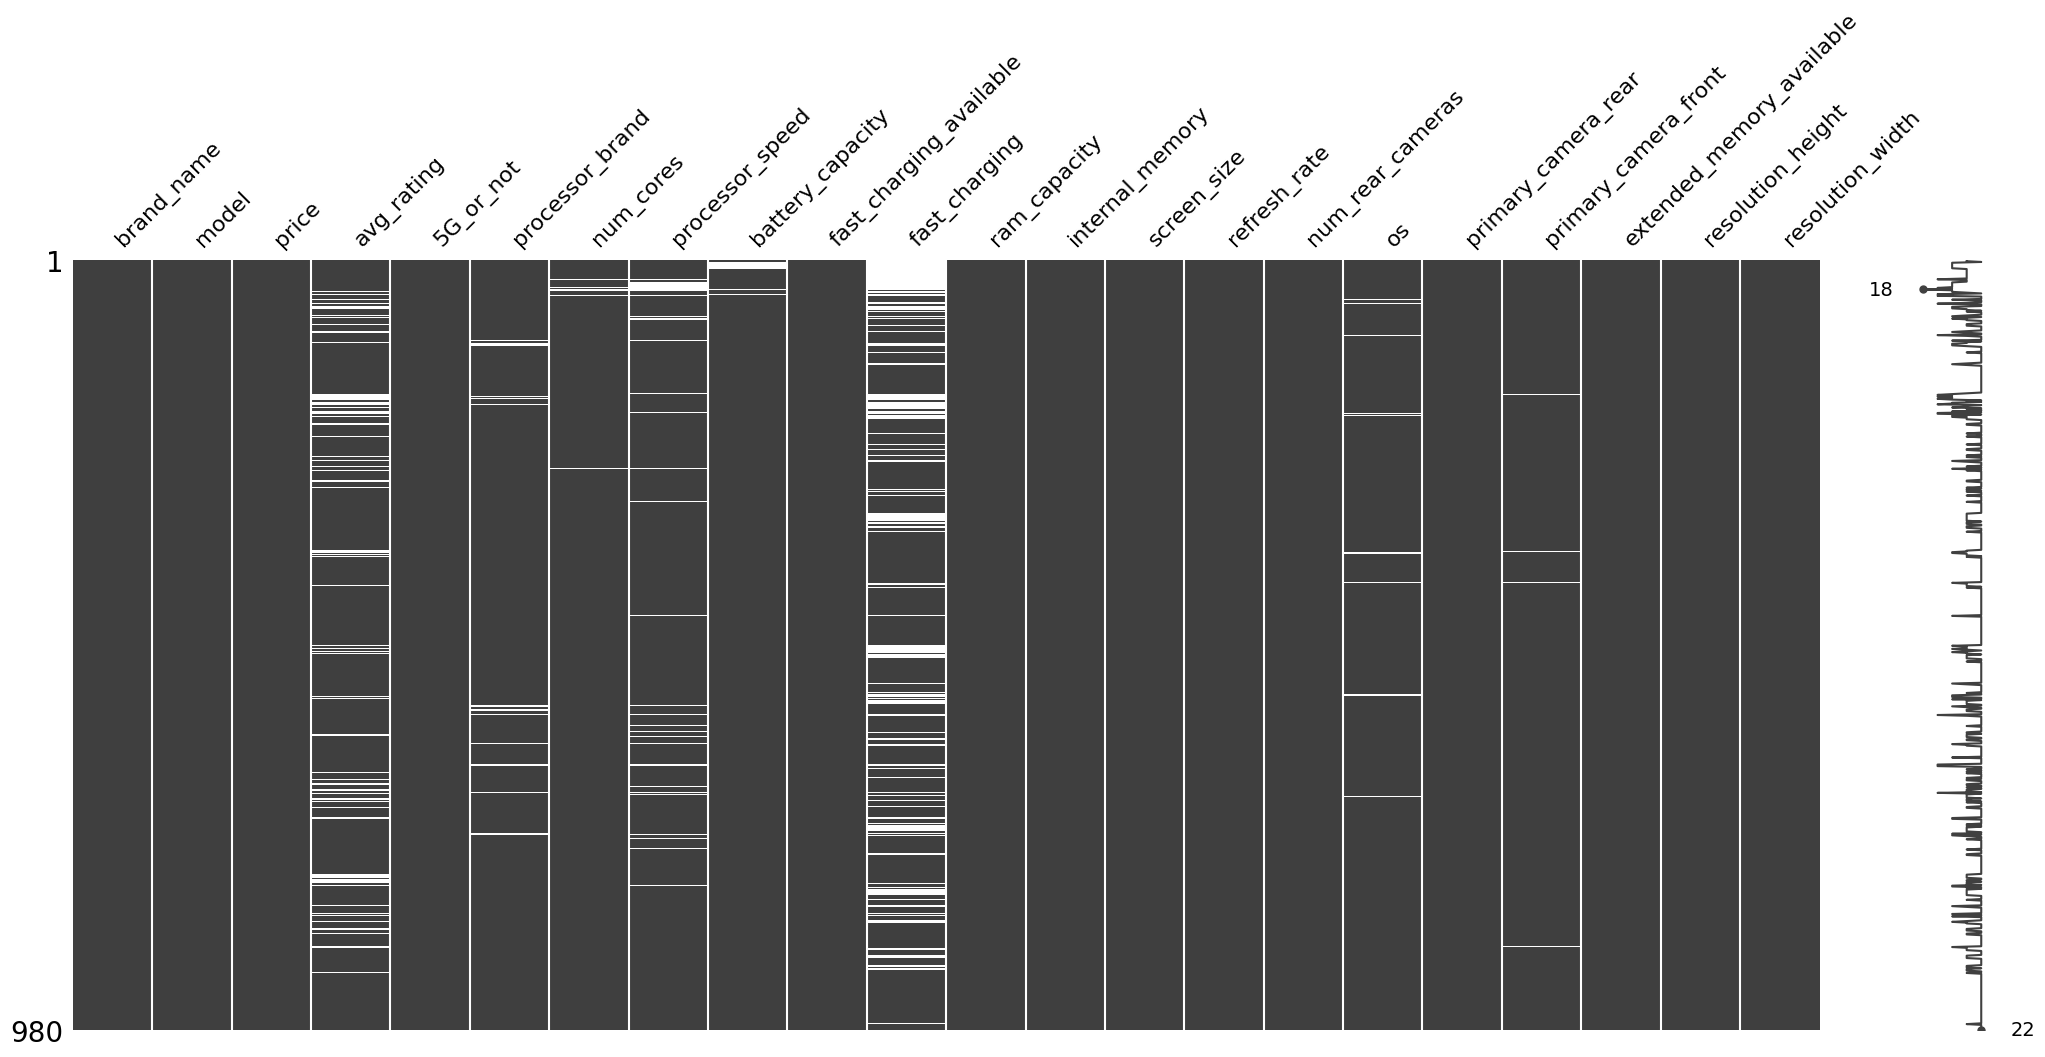

In [ ]:
msno.matrix(df)

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [ ]:
list_smart_phones = df['brand_name'].value_counts()[df['brand_name'].value_counts() > 8].index
df = df[df['brand_name'].isin(list_smart_phones)]
brand_prices = df.groupby('brand_name')[['price']].mean().sort_values(by = 'price', ascending = False)
brand_prices

#To account for outliers, we are removing phone brands whose number of proudcts is less than 1% of the total dataset, which is about 8 phones
#We can see that Apple has significantly higher average price than every other smart phone brand.

,price
brand_name,
apple,95966.521739
huawei,80177.250000
sony,60570.666667
google,44332.571429
samsung,36843.030303
oneplus,35858.571429
iqoo,30301.875000
honor,30301.846154
oppo,29650.034091


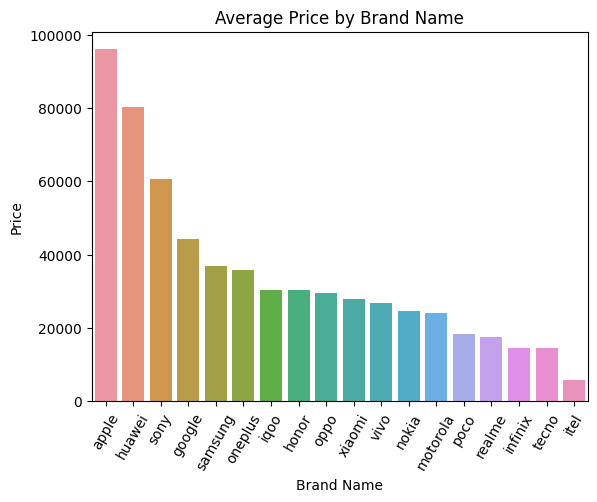

In [ ]:
sns.barplot(data = brand_prices, x = brand_prices.index, y = 'price')
plt.xticks(rotation = 60)
plt.title('Average Price by Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

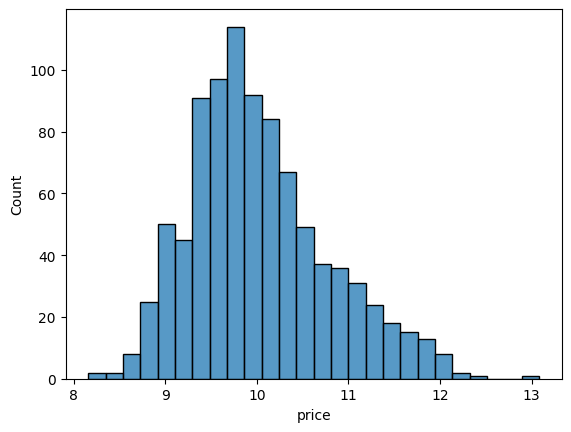

In [ ]:
sns.histplot(data = df, x = np.log(df['price']))

In [ ]:
df['log_price'] = np.log(df['price'])

In [ ]:
df.groupby('brand_name').describe().applymap(lambda x: f"{x:0.2f}")['price'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
apple,46.00,95966.52,43386.62,29990.00,57749.00,84994.50,129990.00,182999.00
huawei,16.00,80177.25,75713.23,10949.00,22740.00,45494.50,115740.00,239999.00
sony,9.00,60570.67,40008.59,15990.00,27999.00,69990.00,82199.00,134999.00
itel,10.00,5811.00,891.04,3999.00,5563.75,5940.00,6365.00,6990.00
google,14.00,44332.57,22096.84,15990.00,30749.00,38240.00,54222.50,81999.00
samsung,132.00,36843.03,33093.52,4999.00,14496.75,22746.50,44249.00,163980.00
oneplus,42.00,35858.57,16852.94,14999.00,22246.75,29994.50,44999.00,74999.00
iqoo,32.00,30301.88,14613.59,13989.00,18373.25,26499.00,35240.00,64999.00
honor,13.00,30301.85,23204.34,9999.00,14990.00,24990.00,32990.00,94990.00


In [ ]:
df['primary_camera_rear'].describe()

count    912.000000
mean      50.971162
std       33.295660
min        2.000000
25%       48.000000
50%       50.000000
75%       64.000000
max      200.000000
Name: primary_camera_rear, dtype: float64

In [ ]:
df[df['processor_speed'].isnull()]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,log_price
24,apple,Apple iPhone 14 Mini,69990,7.0,0,bionic,NaN,NaN,3500.0,1,...,5.42,60,2,ios,12.0,12.0,0,2340,1080,11.156108
28,apple,Apple iPhone 14 Pro,119990,7.5,1,bionic,6.0,NaN,3200.0,1,...,6.10,120,3,ios,48.0,12.0,0,2556,1179,11.695164
29,apple,Apple iPhone 14 Pro (1TB),172999,7.7,1,bionic,6.0,NaN,3200.0,1,...,6.10,120,3,ios,48.0,12.0,0,2556,1179,12.061041
30,apple,Apple iPhone 14 Pro (256GB),129990,7.6,1,bionic,6.0,NaN,3200.0,1,...,6.10,120,3,ios,48.0,12.0,0,2556,1179,11.775213
31,apple,Apple iPhone 14 Pro Max,129990,7.6,1,bionic,6.0,NaN,4323.0,1,...,6.70,120,3,ios,48.0,12.0,0,2796,1290,11.775213
32,apple,Apple iPhone 14 Pro Max (1TB),182999,7.8,1,bionic,6.0,NaN,4323.0,1,...,6.70,120,3,ios,48.0,12.0,0,2796,1290,12.117236
33,apple,Apple iPhone 14 Pro Max (256GB),139990,7.7,1,bionic,6.0,NaN,4323.0,1,...,6.70,120,3,ios,48.0,12.0,0,2796,1290,11.849326
34,apple,Apple iPhone 14 Pro Max (512GB),169900,7.8,1,bionic,6.0,NaN,4323.0,1,...,6.70,120,3,ios,48.0,12.0,0,2796,1290,12.042965
35,apple,Apple iPhone 15,82990,7.2,0,bionic,NaN,NaN,3285.0,1,...,6.06,60,2,ios,50.0,13.0,0,2532,1170,11.326475
36,apple,Apple iPhone 15 Plus,84990,7.5,1,bionic,6.0,NaN,4532.0,1,...,6.71,120,2,ios,12.0,12.0,0,2778,1284,11.350289


In [ ]:
#manual imputing of data, due to incomplete scraping. Also removed several phones that do not exist, yet seemed to have a page on the website it was scraped from, like the Huawei Nova Y61 or the iPhone 9
df.loc[71, 'processor_speed'] = 2.80
df.loc[74, 'processor_speed'] = 2.85
df.loc[75, 'processor_speed'] = 3.00
df.loc[76, 'processor_speed'] = 3.00
df.drop(102, inplace = True)
df.drop(265, inplace = True)
df.drop(606, inplace = True)
df.drop(641, inplace = True)
df.drop(670, inplace = True)
df.drop(680, inplace = True)
df.loc[642, 'processor_speed'] = 2.2
df.loc[643, 'processor_speed'] = 2.4
df.loc[677, 'processor_speed'] = 3.0
df.loc[736, 'processor_speed'] = 3.1
df.loc[749, 'processor_speed'] = 2.8
df.loc[795, 'processor_speed'] = 2.0
df.loc[796, 'processor_speed'] = 2.0
df.loc[169, 'processor_speed'] = 2.99
df.loc[307, 'processor_speed'] = 2.40
df.loc[452, 'processor_speed'] = 2.40
df.loc[567, 'processor_speed'] = 2.0
df.loc[578, 'processor_speed'] = 2.2
df.loc[592, 'processor_speed'] = 2.6
df.loc[600, 'processor_speed'] = 2.4
df.loc[607, 'processor_speed'] = 3.0
df.loc[615, 'processor_speed'] = 2.4
df.loc[632, 'processor_speed'] = 2.4
df.loc[3, 'battery_capacity'] = 2815
df.loc[4, 'battery_capacity'] = 2815
df.loc[37, 'battery_capacity'] = 3274
df.loc[5, 'battery_capacity'] = 2815
df.loc[6, 'battery_capacity'] = 2227
df.loc[7, 'battery_capacity'] = 2227
df.loc[8, 'battery_capacity'] = 2227
df.loc[9, 'battery_capacity'] = 2227
df.loc[10, 'battery_capacity'] = 2815
df.drop(24, inplace = True)
df.drop(41, inplace = True)
df.drop(40, inplace = True)
df.drop(39, inplace = True)
df.drop(45, inplace = True)
df.drop(44, inplace = True)
df.loc[35, 'num_cores'] = 6
df.loc[37, 'num_cores'] = 6
df.loc[38, 'num_cores'] = 6
df.loc[43, 'battery_capacity'] = 2018
df.loc[38, 'battery_capacity'] = 3274
df.loc[28, 'processor_speed'] = 3.46
df.loc[29, 'processor_speed'] = 3.46
df.loc[30, 'processor_speed'] = 3.46
df.loc[31, 'processor_speed'] = 3.46
df.loc[32, 'processor_speed'] = 3.46
df.loc[33, 'processor_speed'] = 3.46
df.loc[34, 'processor_speed'] = 3.46
df.loc[35, 'processor_speed'] = 3.46
df.loc[36, 'processor_speed'] = 3.46
df.loc[37, 'processor_speed'] = 3.78
df.loc[38, 'processor_speed'] = 3.78

In [ ]:
#Dropping fast charging, because it didn't seem useful
df.drop('fast_charging', axis = 1, inplace = True)

In [ ]:
#Looking at average rating per phone brand
brand_ratings = df.groupby('brand_name')[['avg_rating']].mean().sort_values(by = 'avg_rating', ascending = False)
brand_ratings

,avg_rating
brand_name,
oneplus,8.223684
iqoo,8.221875
huawei,8.170000
sony,8.142857
motorola,8.010417
xiaomi,7.877600
oppo,7.873171
poco,7.870000
samsung,7.866964


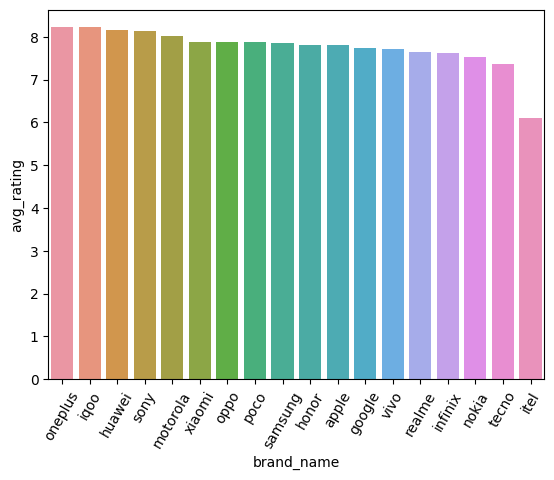

In [ ]:
#Visualization for average rating per phone brand
sns.barplot(brand_ratings, x = brand_ratings.index, y = 'avg_rating')
plt.xticks(rotation = 60)
plt.show()

<Axes: >

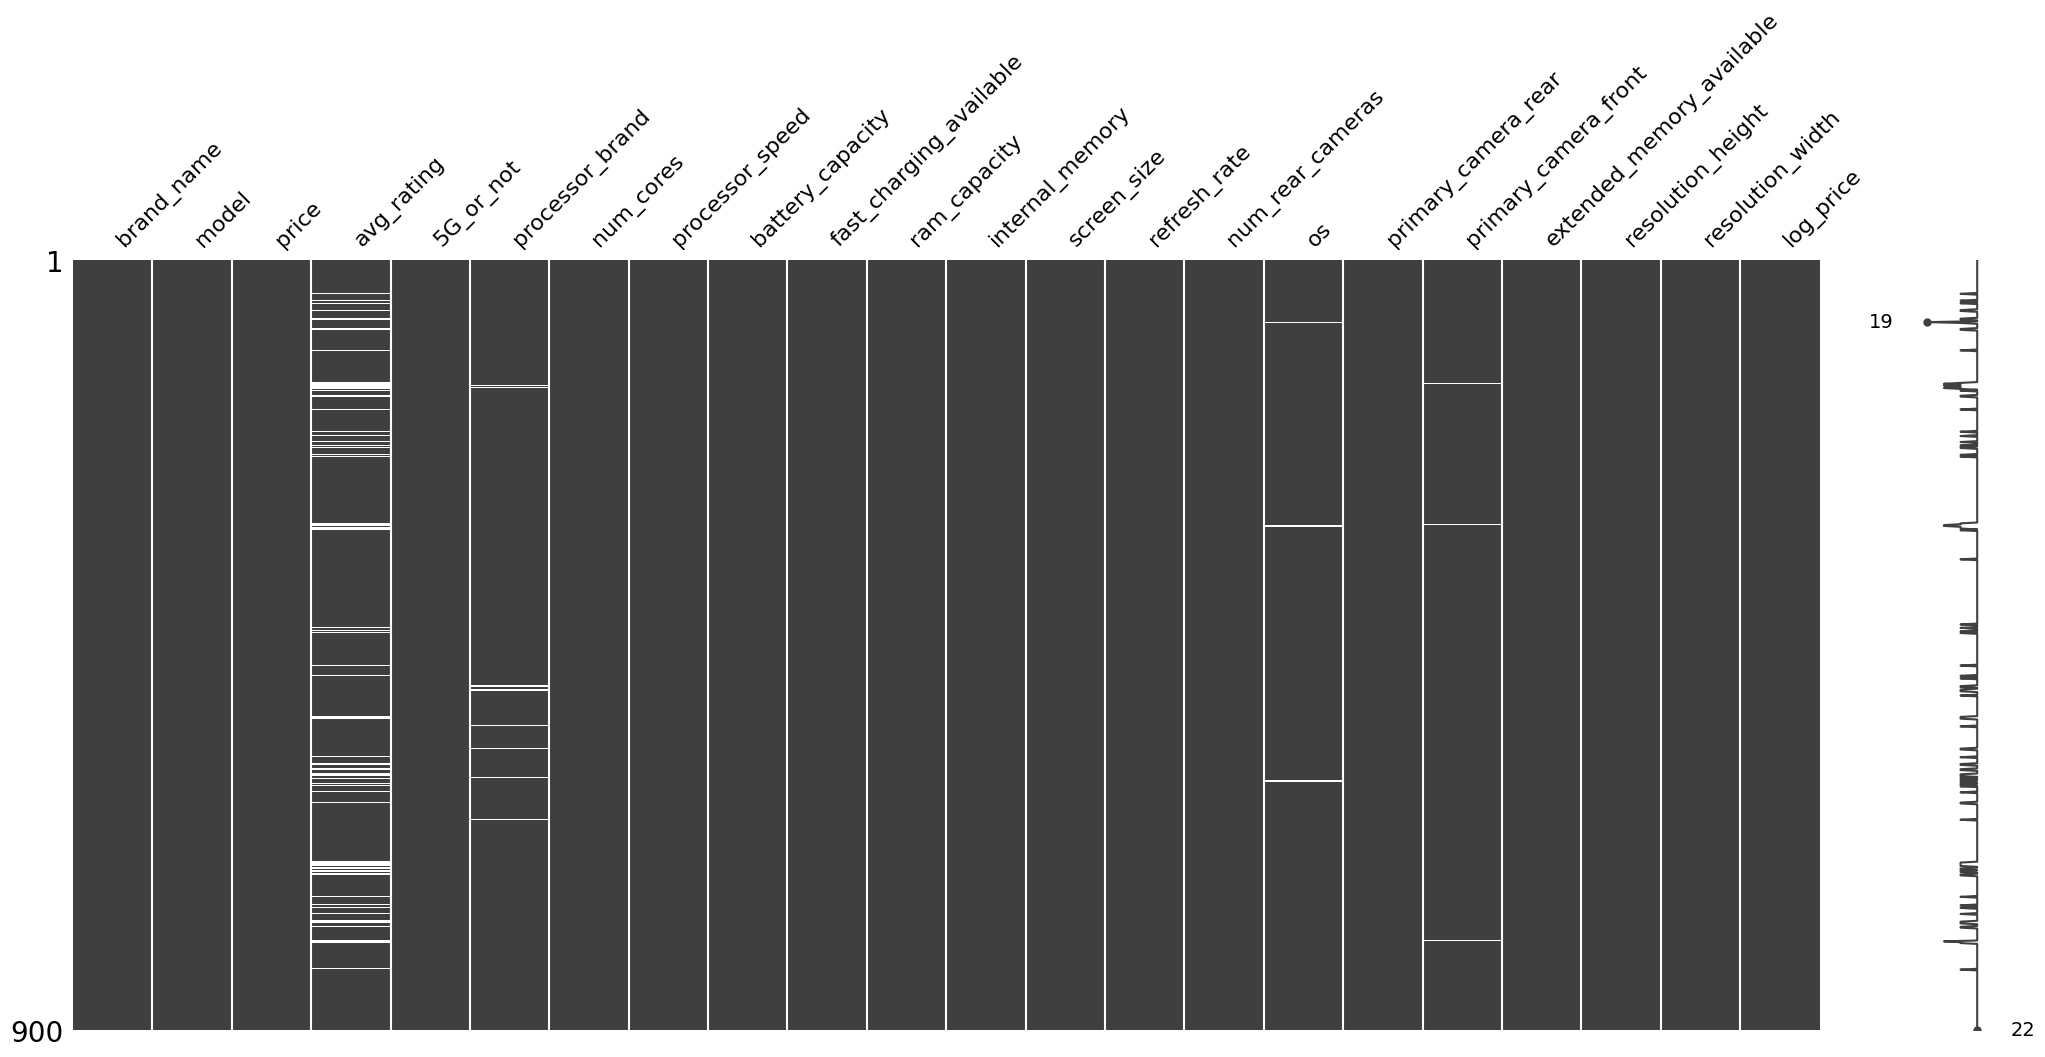

In [ ]:
#Displaying missing rows after we imputed the data
msno.matrix(df)

<ipython-input-21-02ace3785554>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

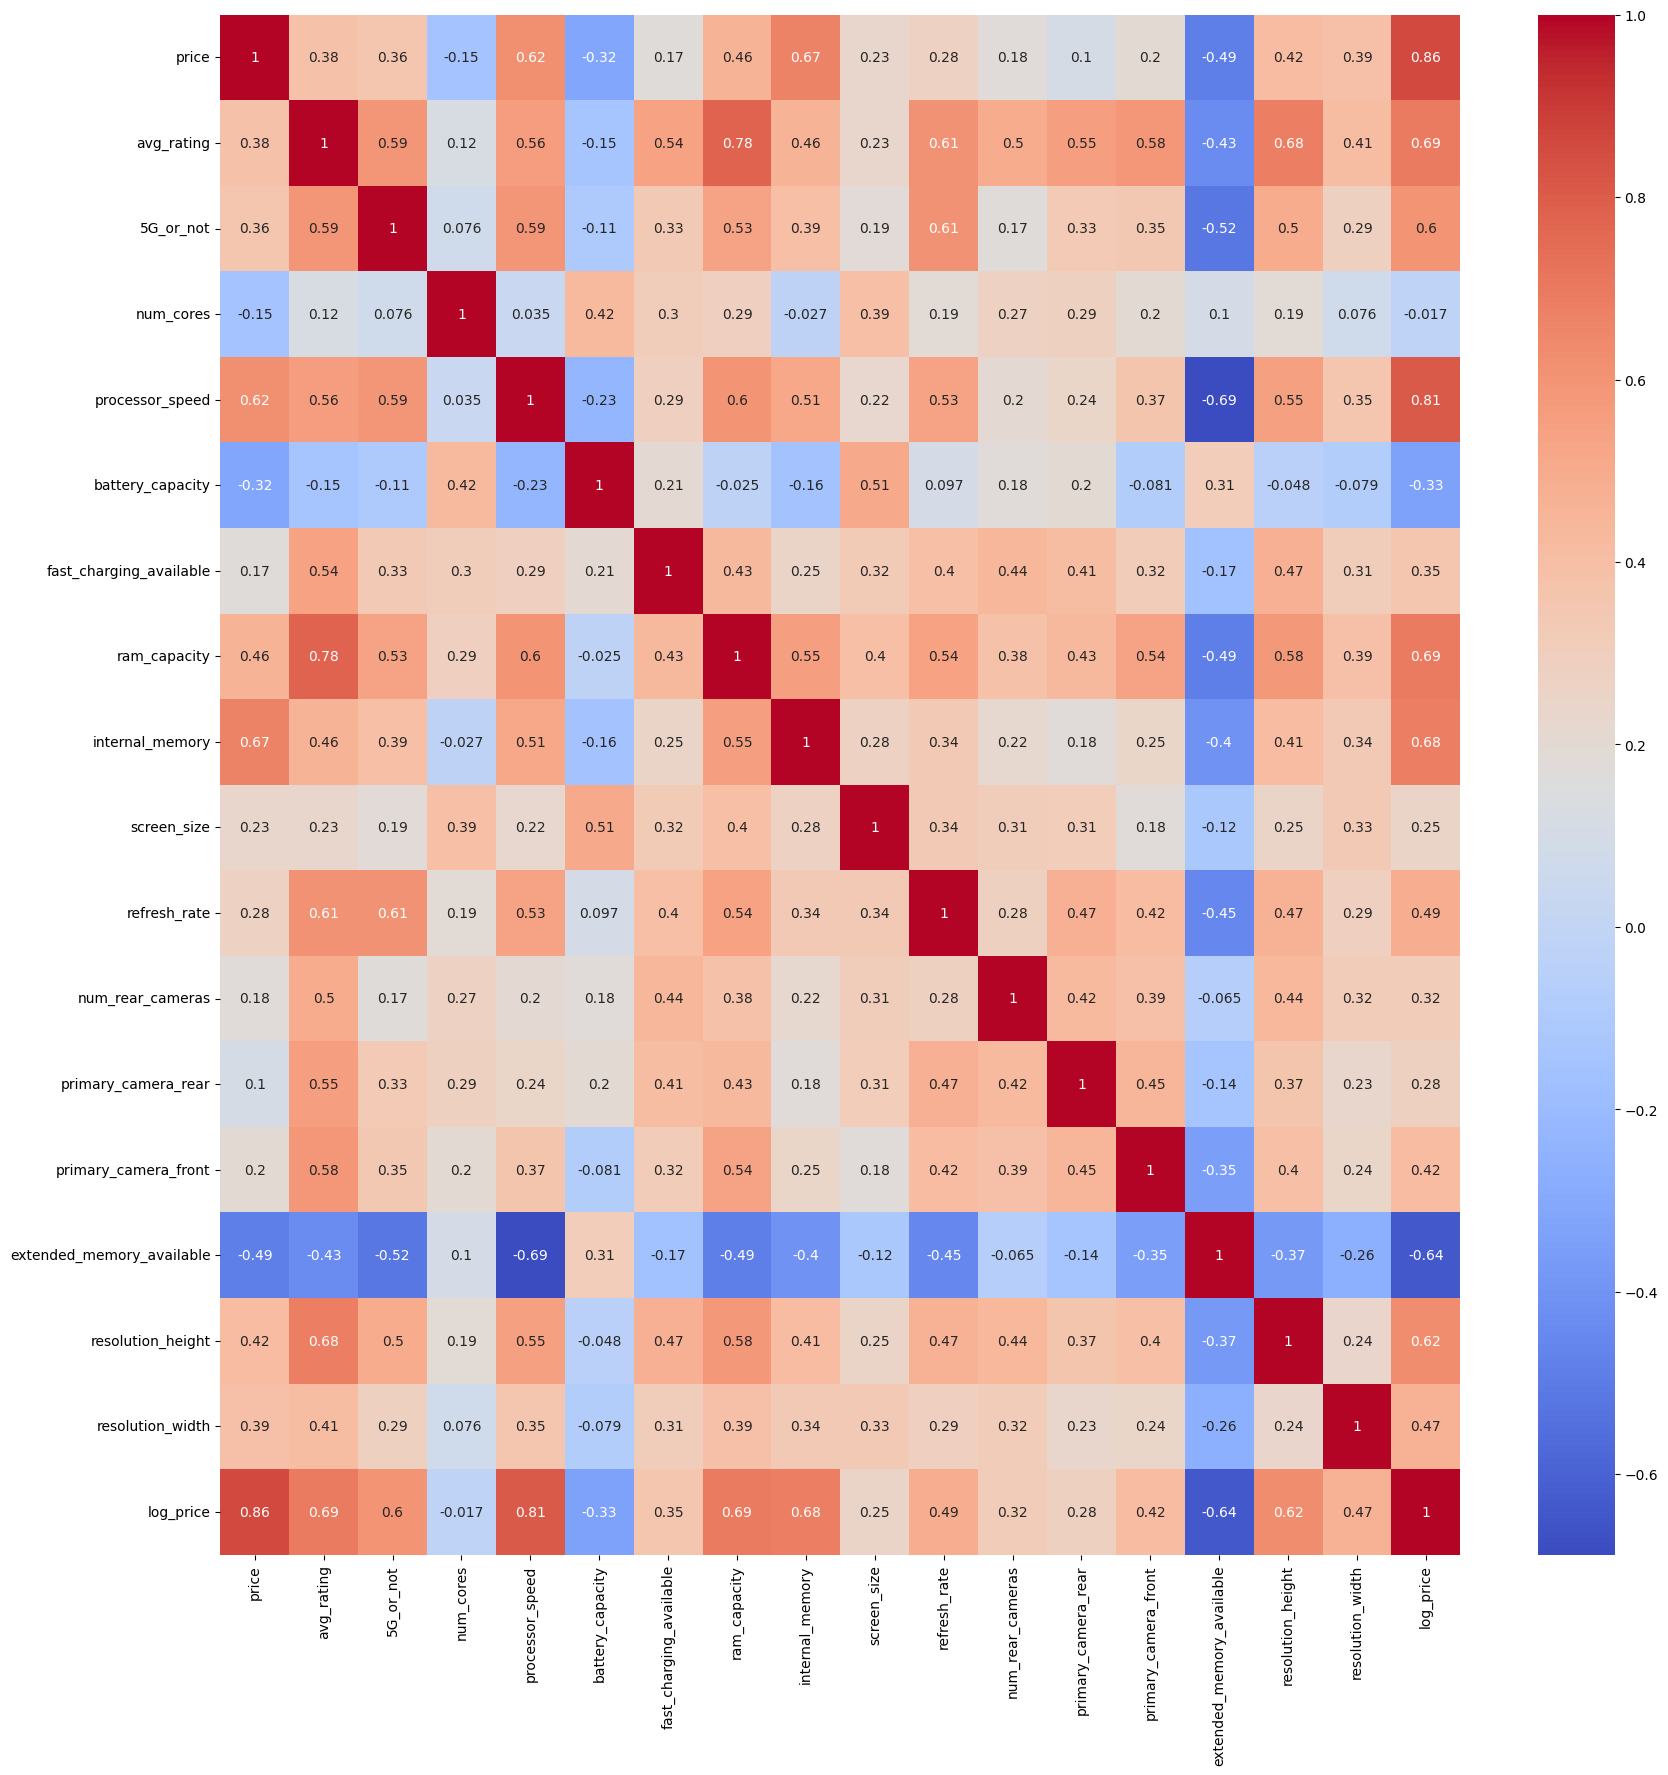

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,log_price
count,900.000000,813.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,896.000000,900.000000,900.000000,900.000000,900.000000
mean,31323.556667,7.833333,0.563333,7.813333,2.446811,4768.605556,0.872222,6.506667,141.324444,6.551511,92.213333,2.853333,50.927444,16.775670,0.644444,2230.611111,1084.176667,10.022117
std,34168.388793,0.709928,0.496248,0.731190,0.463179,633.495161,0.334028,2.604215,106.585916,0.295079,27.665350,0.749223,32.881702,10.904456,0.478947,512.227715,293.571743,0.752995
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,1.000000,8.000000,4.500000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000,8.160232
25%,13483.250000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,4.000000,64.000000,6.500000,60.000000,2.000000,48.000000,8.000000,0.000000,1888.000000,1080.000000,9.509203
50%,19990.000000,8.000000,1.000000,8.000000,2.360000,5000.000000,1.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000,9.902987
75%,34959.250000,8.400000,1.000000,8.000000,2.850000,5000.000000,1.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000,10.461938
max,480000.000000,8.900000,1.000000,8.000000,3.780000,7000.000000,1.000000,16.000000,1024.000000,8.030000,165.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000,13.081541


<Axes: >

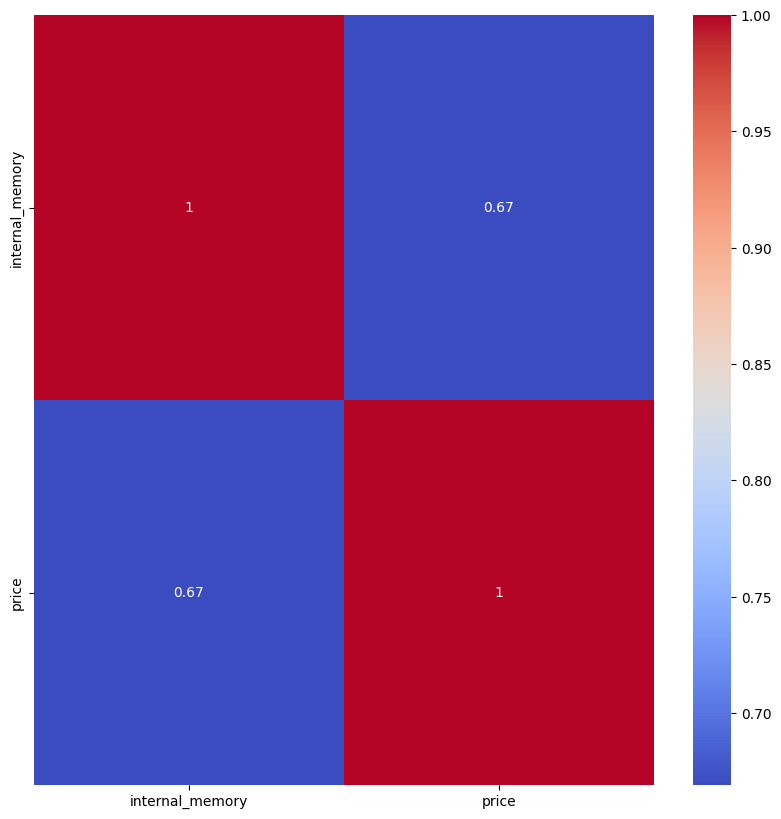

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df[['internal_memory','price']].corr(), annot = True, cmap = 'coolwarm')

In [ ]:
#Looking at the correlation between price and internal memory specifically
df.groupby('primary_camera_rear')['price'].mean()
df[['internal_memory','price']].corr()

,internal_memory,price
internal_memory,1.000000,0.668967
price,0.668967,1.000000


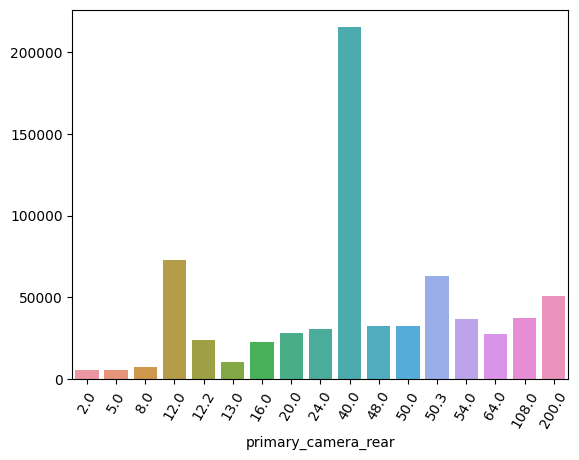

In [ ]:
#Average price per camera quality. There is only 1 (expensive) phone in our dataset with 40 megapixels quality, so that explains the really high average.
sns.barplot(x = df.groupby('primary_camera_rear')['price'].mean().index, y = df.groupby('primary_camera_rear')['price'].mean().values)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df.groupby('brand_name')['primary_camera_rear'].mean()
#On average, not a lots of brands put huge emphasize on rear camera phone


brand_name
apple       21.150000
google      31.914286
honor       66.692308
huawei      55.266667
infinix     59.000000
iqoo        53.500000
itel         6.500000
motorola    67.230769
nokia       77.416667
oneplus     53.595238
oppo        45.875000
poco        54.268293
realme      48.000000
samsung     52.937500
sony        16.333333
tecno       39.272727
vivo        43.194595
xiaomi      65.300746
Name: primary_camera_rear, dtype: float64

In [ ]:
df['primary_camera_rear'].value_counts()

50.0     315
64.0     164
48.0     110
13.0      99
108.0     74
12.0      52
8.0       34
200.0     17
16.0      15
12.2       4
5.0        4
54.0       3
50.3       3
2.0        2
24.0       2
40.0       1
20.0       1
Name: primary_camera_rear, dtype: int64

In [ ]:
df[['processor_speed','price','num_cores']].corr()

,processor_speed,price,num_cores
processor_speed,1.000000,0.622256,0.034763
price,0.622256,1.000000,-0.150792
num_cores,0.034763,-0.150792,1.000000


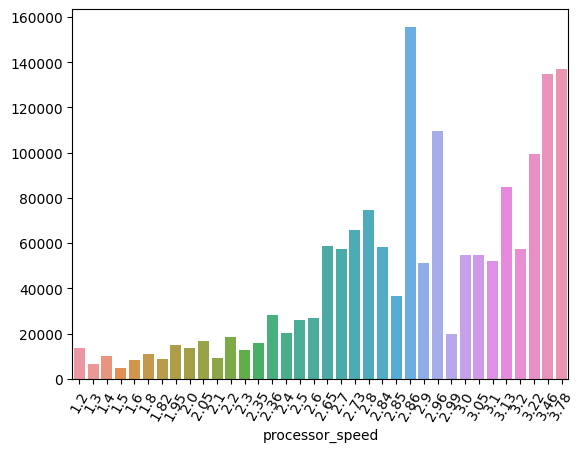

In [ ]:
#Average price by processor speed
sns.barplot(x = df.groupby('processor_speed')['price'].mean().index, y = df.groupby('processor_speed')['price'].mean().values)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='processor_speed', y='price', color='num_cores', title='Scatter Plot of Processor Speed vs. Price')
fig.update_layout(
    xaxis_title='Processor Speed',
    yaxis_title='Price',
    width=800,
    height=600
)
fig.show()


In [ ]:
fig = px.scatter(df, x='primary_camera_rear', y='price', color='num_rear_cameras', title='Scatter Plot of Primary Camera Rear vs. Price')
fig.update_layout(xaxis_title='Primary Camera Rear', yaxis_title='Price', width=1000, height=600)
fig.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame
model = ols('price ~ primary_camera_rear + brand_name', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
## it means that at least one group is different from the others. However, ANOVA alone doesn't tell you which specific groups are different.
## may follow up with a Tukey's HSD test to determine which specific levels of 'primary_camera_rear' are significantly different from each other.
## have no idea how to do that


                           sum_sq     df          F        PR(>F)
brand_name           3.310540e+11   17.0  24.261669  3.492775e-62
primary_camera_rear  4.285814e+10    1.0  53.395435  6.112026e-13
Residual             7.071395e+11  881.0        NaN           NaN


In [ ]:
#1. Regression with primary rear camera quality and price
import statsmodels.api as sm
variables = ['primary_camera_rear']
x = df[variables]
y = df['log_price']
x = sm.add_constant(x)
model = sm.OLS(y, x, missing = 'drop')
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     78.13
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           5.02e-18
Time:                        23:11:26   Log-Likelihood:                -983.68
No. Observations:                 900   AIC:                             1971.
Df Residuals:                     898   BIC:                             1981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.6922    

In [ ]:
#2. We didn't show it to simplify this code base, but we built multiple regression models and added each of these variables one at a time. Once we added enough we decided to check for multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[['primary_camera_rear', 'processor_speed', 'battery_capacity', 'screen_size', 'internal_memory', 'ram_capacity', 'num_rear_cameras']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature         VIF
0  primary_camera_rear    4.749525
1      processor_speed   51.112021
2     battery_capacity   95.874104
3          screen_size  179.170949
4      internal_memory    4.365021
5         ram_capacity   15.398046
6     num_rear_cameras   20.717347


In [ ]:
#3. New model after dropping columns with high VIF

import statsmodels.api as sm
variables = ['primary_camera_rear', 'internal_memory', 'refresh_rate']
x = df[variables]
y = np.log(df['price'])
x = sm.add_constant(x)
model = sm.OLS(y, x, missing = 'drop')
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     353.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.66e-151
Time:                        23:11:26   Log-Likelihood:                -670.08
No. Observations:                 900   AIC:                             1348.
Df Residuals:                     896   BIC:                             1367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.7103    

In [ ]:
#4. Final with highest r-squared value before p value for primary rear camera quality becomes statistically insignificant

import statsmodels.api as sm
variables = ['primary_camera_rear', 'processor_speed', 'battery_capacity', 'screen_size', 'internal_memory', 'ram_capacity']
x = df[variables]
y = np.log(df['price'])
x = sm.add_constant(x)
model = sm.OLS(y, x, missing = 'drop')
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     639.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.47e-319
Time:                        23:11:26   Log-Likelihood:                -271.26
No. Observations:                 900   AIC:                             556.5
Df Residuals:                     893   BIC:                             590.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.0851    

In [ ]:
#5. After adding number of rear cameras, we see that p value for quality has jumped to .167, so it looks like we were just capturing the effect of the number of rear cameras.

import statsmodels.api as sm
variables = ['primary_camera_rear', 'processor_speed', 'battery_capacity', 'screen_size', 'internal_memory', 'ram_capacity', 'num_rear_cameras']
x = df[variables]
y = np.log(df['price'])
x = sm.add_constant(x)
model = sm.OLS(y, x, missing = 'drop')
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     579.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:11:26   Log-Likelihood:                -250.27
No. Observations:                 900   AIC:                             516.5
Df Residuals:                     892   BIC:                             555.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.0457    

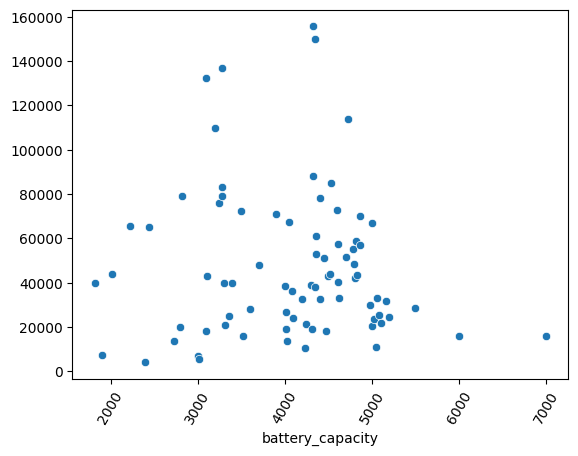

In [ ]:
#Scatterplot of price by battery capacity
sns.scatterplot(x = df.groupby('battery_capacity')['price'].mean().index, y = df.groupby('battery_capacity')['price'].mean().values)
plt.xticks(rotation = 60)
plt.show()

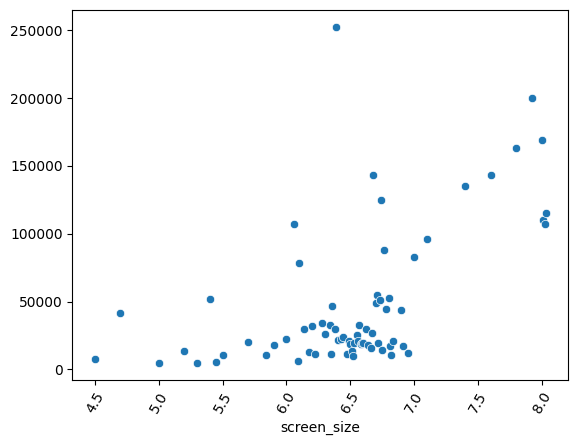

In [ ]:
#Scatterplot of price by screen size

sns.scatterplot(x = df.groupby('screen_size')['price'].mean().index, y = df.groupby('screen_size')['price'].mean().values)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df[['battery_capacity','price','screen_size']].corr()

,battery_capacity,price,screen_size
battery_capacity,1.000000,-0.315902,0.507109
price,-0.315902,1.000000,0.234926
screen_size,0.507109,0.234926,1.000000


In [ ]:
fig = px.scatter(df, x="battery_capacity", y="price", color="brand_name")
fig.show()

In [ ]:
fig = px.scatter(df, x="screen_size", y="price", color="brand_name")
fig.show()